In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from gensim.models import KeyedVectors
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.utils import to_categorical
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, GenerationConfig, TrainingArguments, Trainer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
import torch
import time
import seaborn as sns


In [2]:
!pip install evaluate


In [3]:
import evaluate

In [4]:
import pyarrow
import requests

print(pyarrow.__version__)
print(requests.__version__)

16.1.0
2.32.3


In [5]:
from transformers import Trainer
from transformers.trainer_utils import EvaluationStrategy
from transformers.training_args import TrainingArguments

In [6]:
!pip install peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 38.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-many

In [7]:
import peft

In [8]:
from peft import LoraConfig, get_peft_model, TaskType

In [9]:
!pip install bitsandbytes accelerate transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 4.3 MB/s eta 0:00:00


In [10]:
!pip install gdown

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import gdown

# File ID from the Google Drive shareable link
file_id = '1L9Y-fOHEkqQ-osHYPQQgintZsR7x_UaZ'
# URL to be used with gdown
gdown_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
gdown.download(gdown_url, 'data.csv', quiet=False)

# Read the CSV file into a DataFrame
data = pd.read_csv('data.csv', encoding='utf-8')
data.head()

Downloading...
From (original): https://drive.google.com/uc?id=1L9Y-fOHEkqQ-osHYPQQgintZsR7x_UaZ
From (redirected): https://drive.google.com/uc?id=1L9Y-fOHEkqQ-osHYPQQgintZsR7x_UaZ&confirm=t&uuid=b9221783-36e0-48f8-847a-5b455339a7fb
To: /content/data.csv
100%|██████████| 266M/266M [00:05<00:00, 51.5MB/s]


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [15]:
# Get unique values
unique_values = data['primaryCategories'].unique()

print(unique_values)

['Health & Beauty' 'Electronics' 'Office Supplies'
 'Animals & Pet Supplies' 'Home & Garden' 'Electronics,Furniture'
 'Toys & Games,Electronics' 'Electronics,Media'
 'Office Supplies,Electronics']


In [16]:
data = data[["dateAdded", "primaryCategories", "reviews.username", "brand", "reviews.text", "reviews.title", "reviews.rating"]]

data.head()

,dateAdded,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating
0,2015-10-30T08:59:32Z,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3
1,2015-10-30T08:59:32Z,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4
2,2015-10-30T08:59:32Z,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5
3,2015-10-30T08:59:32Z,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5
4,2015-10-30T08:59:32Z,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5


In [17]:
# Concatenate
data['reviews.text'] = data['reviews.text'] + ' ' + data['reviews.title']

data.head()

,dateAdded,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating
0,2015-10-30T08:59:32Z,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3
1,2015-10-30T08:59:32Z,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4
2,2015-10-30T08:59:32Z,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5
3,2015-10-30T08:59:32Z,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5
4,2015-10-30T08:59:32Z,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5


In [18]:
data = pd.DataFrame(data)

# Convert the 'dateAdded' column to datetime format
data['dateAdded'] = pd.to_datetime(data['dateAdded'])

# Extract the year and create a new column 'year'
data['year'] = data['dateAdded'].dt.year

# Drop column
data.drop(['dateAdded'], axis=1, inplace=True)

# Display the resulting DataFrame
data.head()

,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating,year
0,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,2015
1,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,2015
2,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,2015
3,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,2015
4,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,2015


In [19]:
# Check for missing values in the entire DataFrame
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

primaryCategories    0
reviews.username     5
brand                0
reviews.text         0
reviews.title        0
reviews.rating       0
year                 0
dtype: int64


In [20]:
# Remove rows where 'reviews.username' is empty
data = data.dropna(subset=['reviews.username'])

# Check for missing values in the entire DataFrame
missing_values = data.isnull().sum()

print (missing_values)
data.head()

primaryCategories    0
reviews.username     0
brand                0
reviews.text         0
reviews.title        0
reviews.rating       0
year                 0
dtype: int64


,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating,year
0,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,2015
1,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,2015
2,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,2015
3,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,2015
4,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,2015


In [21]:
# Get the value counts for the 'reviews.rating' column
rating_counts = data['reviews.rating'].value_counts()
print(rating_counts)

reviews.rating
5    19893
4     5648
3     1206
1      965
2      615
Name: count, dtype: int64


In [22]:
# Function to determine negative, neutral and positive
def review_sentiment(rating):
    if rating in [1, 2]:
        return "negative"
    elif rating in [3]:
        return "neutral"
    elif rating in [4, 5]:
        return "positive"
    else:
        return None

In [23]:

# Apply the reviews rating
data['sentiment'] = data['reviews.rating'].apply(review_sentiment)
data.head()



,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating,year,sentiment
0,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,2015,neutral
1,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,2015,positive
2,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,2015,positive
3,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,2015,positive
4,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,2015,positive


In [24]:
# Optionally we can now drop the reviews rating column, if we are just going to use sentiment.
data.drop(['reviews.rating'], axis=1, inplace=True)
data.head()

,primaryCategories,reviews.username,brand,reviews.text,reviews.title,year,sentiment
0,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,2015,neutral
1,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,2015,positive
2,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,2015,positive
3,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,2015,positive
4,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,2015,positive


In [25]:
import re
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification, create_optimizer
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Define a function to clean text data
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters and punctuation
    text = re.sub(r'[\u00BA\u00C4\u00C5\u00D4\u00E3\u00E8\u00EC\u00F2\u00F4\u00F9\u00FA\u0192]+', '', text)  # Remove specified characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove unnecessary whitespace
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters
    return text

# Clean the review texts
data['reviews.text'] = [clean_text(review) for review in data['reviews.text']]

# Map sentiment labels to integers
label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
data['labels'] = [label_map[sentiment] for sentiment in data['sentiment']]

# Split the data into training, validation, and test sets
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    data['reviews.text'], data['labels'], test_size=0.2, random_state=42
)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42
)

# Create datasets.Dataset objects for train, validation, and test sets
train_data = {'reviews.text': train_texts, 'labels': train_labels}
val_data = {'reviews.text': val_texts, 'labels': val_labels}
test_data = {'reviews.text': test_texts, 'labels': test_labels}

train_dataset = Dataset.from_dict(train_data)
val_dataset = Dataset.from_dict(val_data)
test_dataset = Dataset.from_dict(test_data)

# Combine datasets into a DatasetDict
dataset = DatasetDict({'train': train_dataset, 'validation': val_dataset, 'test': test_dataset})

# Load tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize function for mapping
def tokenize_function(examples):
    return tokenizer(examples['reviews.text'], padding='max_length', truncation=True)

# Tokenize datasets
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Convert tokenized datasets to TensorFlow datasets
def to_tf_dataset(ds, shuffle=True, batch_size=8):
    ds = ds.remove_columns(['reviews.text'])
    ds = ds.with_format("tensorflow")
    features = {x: ds[x] for x in tokenizer.model_input_names}
    tf_ds = tf.data.Dataset.from_tensor_slices((features, ds["labels"]))
    if shuffle:
        tf_ds = tf_ds.shuffle(buffer_size=len(ds))
    tf_ds = tf_ds.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return tf_ds

train_tf_dataset = to_tf_dataset(tokenized_datasets['train'])
val_tf_dataset = to_tf_dataset(tokenized_datasets['validation'], shuffle=False)
test_tf_dataset = to_tf_dataset(tokenized_datasets['test'], shuffle=False)

# Initialize the model
peft_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

# Compile the model
batch_size = 8
num_train_steps = len(train_tf_dataset) * 5
optimizer, lr_schedule = create_optimizer(init_lr=5e-5, num_train_steps=num_train_steps, num_warmup_steps=0)

peft_model.compile(optimizer=optimizer,
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, restore_best_weights=True)

# Train the model with early stopping
peft_model.fit(train_tf_dataset, validation_data=val_tf_dataset, epochs=12, callbacks=[early_stopping])

# Evaluate the model on the test set
evaluation_result = peft_model.evaluate(test_tf_dataset)

print("Test Set Evaluation result:", evaluation_result)




tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/22661 [00:00<?, ? examples/s]

Map:   0%|          | 0/2833 [00:00<?, ? examples/s]

Map:   0%|          | 0/2833 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/12


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2833/2833 [==============================] - 404s 126ms/step - loss: 0.1810 - sparse_categorical_accuracy: 0.9282 - val_loss: 0.1643 - val_sparse_categorical_accuracy: 0.9418
Epoch 2/12
2833/2833 [==============================] - 343s 121ms/step - loss: 0.0996 - sparse_categorical_accuracy: 0.9484 - val_loss: 0.1026 - val_sparse_categorical_accuracy: 0.9542
Epoch 3/12
2833/2833 [==============================] - 342s 121ms/step - loss: 0.0522 - sparse_categorical_accuracy: 0.9597 - val_loss: 0.1077 - val_sparse_categorical_accuracy: 0.9639
Epoch 4/12
2833/2833 [==============================] - 342s 121ms/step - loss: 0.0237 - sparse_categorical_accuracy: 0.9677 - val_loss: 0.1079 - val_sparse_categorical_accuracy: 0.9708
Epoch 5/12
2833/2833 [==============================] - 341s 120ms/step - loss: 0.0115 - sparse_categorical_accuracy: 0.9735 - va

In [26]:

from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification, Trainer, TrainingArguments

355/355 [==============================] - 18s 41ms/step
Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.89      0.90       160
     neutral       0.80      0.70      0.75       117
    positive       0.99      0.99      0.99      2556

    accuracy                           0.98      2833
   macro avg       0.90      0.86      0.88      2833
weighted avg       0.98      0.98      0.98      2833

Confusion Matrix:
 [[ 142   10    8]
 [  10   82   25]
 [   4   10 2542]]


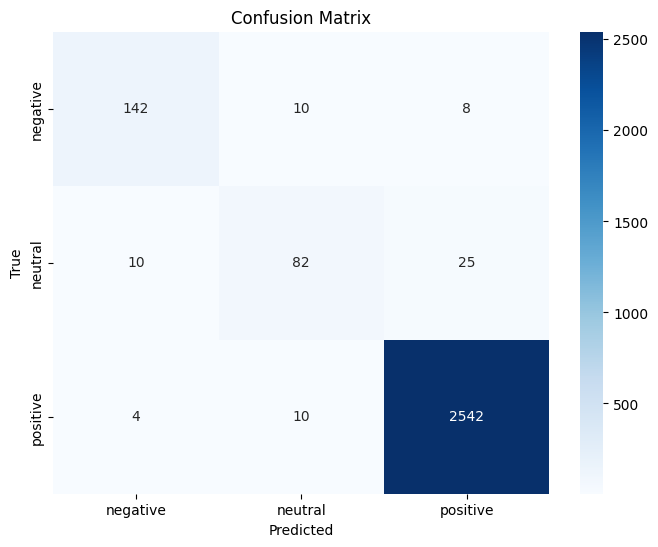

In [27]:
# Generate predictions
predictions = peft_model.predict(val_tf_dataset)
predicted_labels = np.argmax(predictions.logits, axis=-1)

# Generate classification report
classification_rep = classification_report(val_labels, predicted_labels, target_names=["negative", "neutral", "positive"])
print("Classification Report:\n", classification_rep)

# Generate confusion matrix
conf_matrix = confusion_matrix(val_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["negative", "neutral", "positive"], yticklabels=["negative", "neutral", "positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Print predicted labels and true labels
print("Predicted Labels:", predicted_labels)
print("True Labels:", val_labels)

Predicted Labels: [2 0 2 ... 2 2 2]
True Labels: 9410     2
11863    0
7539     2
23529    2
25415    2
        ..
27310    2
9541     2
5453     2
2412     2
22072    2
Name: labels, Length: 2833, dtype: int64


In [30]:
peft_model.save('/content/drive/MyDrive/distill')